In [18]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (14,10)

In [2]:

# https://www.kaggle.com/fedesoriano/heart-failure-prediction
df = pd.read_csv(r'C:\Users\shhimel\Desktop\heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.isna().sum()


Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [4]:
df.shape

(918, 12)

In [5]:
df.describe()


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


###  Data Vizualization


In [16]:
df['HeartDisease'].value_counts()


1    508
0    410
Name: HeartDisease, dtype: int64

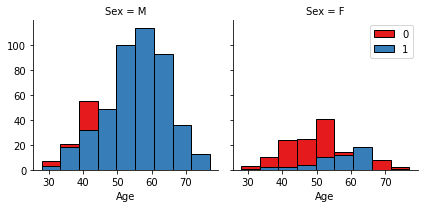

In [19]:
import seaborn as sns

bins = np.linspace(df.Age.min(), df.Age.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

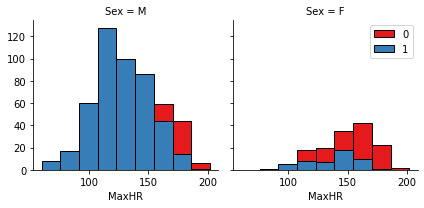

In [22]:
bins = np.linspace(df.MaxHR.min(), df.MaxHR.max(), 10)
g = sns.FacetGrid(df, col="Sex", hue="HeartDisease", palette="Set1", col_wrap=2)
g.map(plt.hist, 'MaxHR', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [25]:
df.groupby(['Sex'])['HeartDisease'].value_counts(normalize=True)


Sex  HeartDisease
F    0               0.740933
     1               0.259067
M    1               0.631724
     0               0.368276
Name: HeartDisease, dtype: float64

###  Data Outliering


In [26]:
df[df.Cholesterol>(df.Cholesterol.mean()+3*df.Cholesterol.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0


In [27]:
df.shape


(918, 12)

In [28]:
df1 = df[df.Cholesterol<=(df.Cholesterol.mean()+3*df.Cholesterol.std())]
df1.shape

(915, 12)

In [29]:
df[df.MaxHR>(df.MaxHR.mean()+3*df.MaxHR.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [30]:
df[df.FastingBS>(df.FastingBS.mean()+3*df.FastingBS.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease


In [31]:
df[df.Oldpeak>(df.Oldpeak.mean()+3*df.Oldpeak.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
166,50,M,ASY,140,231,0,ST,140,Y,5.0,Flat,1
702,59,M,TA,178,270,0,LVH,145,N,4.2,Down,0
771,55,M,ASY,140,217,0,Normal,111,Y,5.6,Down,1
791,51,M,ASY,140,298,0,Normal,122,Y,4.2,Flat,1
850,62,F,ASY,160,164,0,LVH,145,N,6.2,Down,1
900,58,M,ASY,114,318,0,ST,140,N,4.4,Down,1


In [32]:
df2 = df1[df1.Oldpeak<=(df1.Oldpeak.mean()+3*df1.Oldpeak.std())]
df2.shape

(909, 12)

In [33]:
df[df.RestingBP>(df.RestingBP.mean()+3*df.RestingBP.std())]


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1


In [34]:
df3 = df2[df2.RestingBP<=(df2.RestingBP.mean()+3*df2.RestingBP.std())]
df3.shape

(902, 12)

In [35]:
df.ChestPainType.unique()


array(['ATA', 'NAP', 'ASY', 'TA'], dtype=object)

In [36]:
df.RestingECG.unique()


array(['Normal', 'ST', 'LVH'], dtype=object)

In [37]:
df.ExerciseAngina.unique()


array(['N', 'Y'], dtype=object)

In [38]:
df.ST_Slope.unique()


array(['Up', 'Flat', 'Down'], dtype=object)

In [39]:
df4 = df3.copy()
df4.ExerciseAngina.replace(
    {
        'N': 0,
        'Y': 1
    },
    inplace=True)

df4.ST_Slope.replace(
    {
        'Down': 1,
        'Flat': 2,
        'Up': 3
    },
    inplace=True
)

df4.RestingECG.replace(
    {
        'Normal': 1,
        'ST': 2,
        'LVH': 3
    },
    inplace=True)

df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,3,0
1,49,F,NAP,160,180,0,1,156,0,1.0,2,1
2,37,M,ATA,130,283,0,2,98,0,0.0,3,0
3,48,F,ASY,138,214,0,1,108,1,1.5,2,1
4,54,M,NAP,150,195,0,1,122,0,0.0,3,0


In [42]:
df5 = pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,0,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,1,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,0,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,1,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,0,1,0,1,0


In [43]:
X = df5.drop("HeartDisease",axis='columns')
y = df5.HeartDisease

X.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0


In [44]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-1.42896269,  0.46089071,  0.85238015, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-0.47545956,  1.5925728 , -0.16132855, ..., -0.4836591 ,
         1.86750159, -0.22914788],
       [-1.74679706, -0.10495034,  0.79657967, ...,  2.06757196,
        -0.53547478, -0.22914788],
       ...,
       [ 0.37209878, -0.10495034, -0.61703246, ..., -0.4836591 ,
        -0.53547478, -0.22914788],
       [ 0.37209878, -0.10495034,  0.35947592, ...,  2.06757196,
        -0.53547478, -0.22914788],
       [-1.64085227,  0.3477225 , -0.20782894, ..., -0.4836591 ,
         1.86750159, -0.22914788]])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=4)

In [47]:
X_train.shape


(721, 13)

In [48]:
X_test.shape


(181, 13)

In [67]:
from sklearn.metrics import accuracy_score


In [68]:
from sklearn.ensemble import RandomForestClassifier
for d in range(1,50):
    dt = RandomForestClassifier(criterion = 'entropy', max_depth = d).fit(X_train, y_train)
    dt_yhat = dt.predict(X_test)
    print("For depth = {}  the accuracy score is {} ".format(d, accuracy_score(y_test, dt_yhat)))



For depth = 1  the accuracy score is 0.8342541436464088 
For depth = 2  the accuracy score is 0.861878453038674 
For depth = 3  the accuracy score is 0.850828729281768 
For depth = 4  the accuracy score is 0.8674033149171271 
For depth = 5  the accuracy score is 0.8674033149171271 
For depth = 6  the accuracy score is 0.8784530386740331 
For depth = 7  the accuracy score is 0.861878453038674 
For depth = 8  the accuracy score is 0.8729281767955801 
For depth = 9  the accuracy score is 0.8784530386740331 
For depth = 10  the accuracy score is 0.8729281767955801 
For depth = 11  the accuracy score is 0.8839779005524862 
For depth = 12  the accuracy score is 0.8729281767955801 
For depth = 13  the accuracy score is 0.8839779005524862 
For depth = 14  the accuracy score is 0.8729281767955801 
For depth = 15  the accuracy score is 0.8784530386740331 
For depth = 16  the accuracy score is 0.8839779005524862 
For depth = 17  the accuracy score is 0.8784530386740331 
For depth = 18  the accura

In [69]:
model_rf = RandomForestClassifier(criterion = 'entropy', max_depth = 38).fit(X_train, y_train)
model_rf.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', max_depth=38)

In [70]:
model_rf.score(X_test, y_test)

0.8784530386740331

### Use PCA to reduce dimensions


In [71]:
X

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA
0,40,140,289,0,1,172,0,0.0,3,1,1,0,0
1,49,160,180,0,1,156,0,1.0,2,0,0,1,0
2,37,130,283,0,2,98,0,0.0,3,1,1,0,0
3,48,138,214,0,1,108,1,1.5,2,0,0,0,0
4,54,150,195,0,1,122,0,0.0,3,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,1,132,0,1.2,2,1,0,0,1
914,68,144,193,1,1,141,0,3.4,2,1,0,0,0
915,57,130,131,0,1,115,1,1.2,2,1,0,0,0
916,57,130,236,0,3,174,0,0.0,2,0,1,0,0


In [75]:
from sklearn.decomposition import PCA

pca = PCA(0.99)
X_pca = pca.fit_transform(X)
X_pca

array([[ 93.82465373, -29.40099458, -11.5858984 ],
       [-15.58422331, -14.10909233, -31.680368  ],
       [ 83.29606634,  38.6867453 ,  15.39992052],
       ...,
       [-67.57318721,  17.61319354,   4.35202042],
       [ 40.70458237, -33.38750602,  -5.99332666],
       [-19.91368346, -37.29085722, -13.31321738]])

In [76]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=30)


In [77]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()
model_rf.fit(X_train_pca, y_train)
model_rf.score(X_test_pca, y_test)

0.6850828729281768